In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import re

# 1. Load the dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\Untitled spreadsheet - Expanded_Travel_Dataset.csv")

# 2. Drop unnecessary columns
df = df.drop(columns=["Trip ID", "Traveler name", "Start date", "End date"])

# 3. Clean and convert cost columns to numeric
def clean_currency(x):
    """Remove dollar signs and commas, convert to float"""
    if isinstance(x, str):
        return float(re.sub(r'[^\d.]', '', x))
    return float(x)

df['Accommodation cost'] = df['Accommodation cost'].apply(clean_currency)
df['Transportation cost'] = df['Transportation cost'].apply(clean_currency)

# 4. Handle missing values
df = df.dropna()

# 5. Feature Engineering
df['Duration_Group'] = pd.cut(df['Duration (days)'], 
                            bins=[0, 3, 7, 14, 30, 100],
                            labels=['short', 'medium', 'long', 'extended', 'very_long'])
df['Age_Group'] = pd.cut(df['Traveler age'],
                       bins=[0, 18, 30, 50, 100],
                       labels=['young', 'adult', 'middle_aged', 'senior'])

# 6. Define features and targets
X = df.drop(columns=["Accommodation cost", "Transportation cost"])
y = df[["Accommodation cost", "Transportation cost"]]

# 7. Identify column types
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

# 8. Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 9. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 10. Create and train the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            random_state=42,
            min_samples_leaf=10
        )
    ))
])

model.fit(X_train, y_train)

# 11. Predict on test data
y_pred = model.predict(X_test)

# 12. Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("🎯 Evaluation Results:")
print("Mean Squared Error (Accommodation, Transportation):", mse)
print("R² Score (Accommodation, Transportation):", r2)

# 13. Save the trained model
joblib.dump(model, "improved_multi_cost_predictor.pkl")
print("✅ Model saved as 'improved_multi_cost_predictor.pkl'")

# 14. Predict on a sample input
sample_input = X_test.iloc[[0]]
sample_prediction = model.predict(sample_input)

print("\n🔍 Sample Prediction:")
print("Input:\n", sample_input)
print("Predicted Accommodation Cost: ${:.2f}".format(sample_prediction[0][0]))
print("Predicted Transportation Cost: ${:.2f}".format(sample_prediction[0][1]))
print("Actual Accommodation Cost: ${:.2f}".format(y_test.iloc[0, 0]))
print("Actual Transportation Cost: ${:.2f}".format(y_test.iloc[0, 1]))

🎯 Evaluation Results:
Mean Squared Error (Accommodation, Transportation): [93864.64494632 12474.06526359]
R² Score (Accommodation, Transportation): [0.94431365 0.96279079]
✅ Model saved as 'improved_multi_cost_predictor.pkl'

🔍 Sample Prediction:
Input:
            Destination  Duration (days)  Traveler age Traveler gender  \
203  Sydney, Australia              7.0          33.0            Male   

    Traveler nationality Accommodation type Transportation type  \
203             Canadian             Airbnb               Train   

    Duration_Group    Age_Group  
203         medium  middle_aged  
Predicted Accommodation Cost: $1035.96
Predicted Transportation Cost: $244.92
Actual Accommodation Cost: $800.00
Actual Transportation Cost: $150.00


🎯 Evaluation Results:
Mean Squared Error (Accommodation, Transportation): [93864.64494632 12474.06526359]
R² Score (Accommodation, Transportation): [0.94431365 0.96279079]


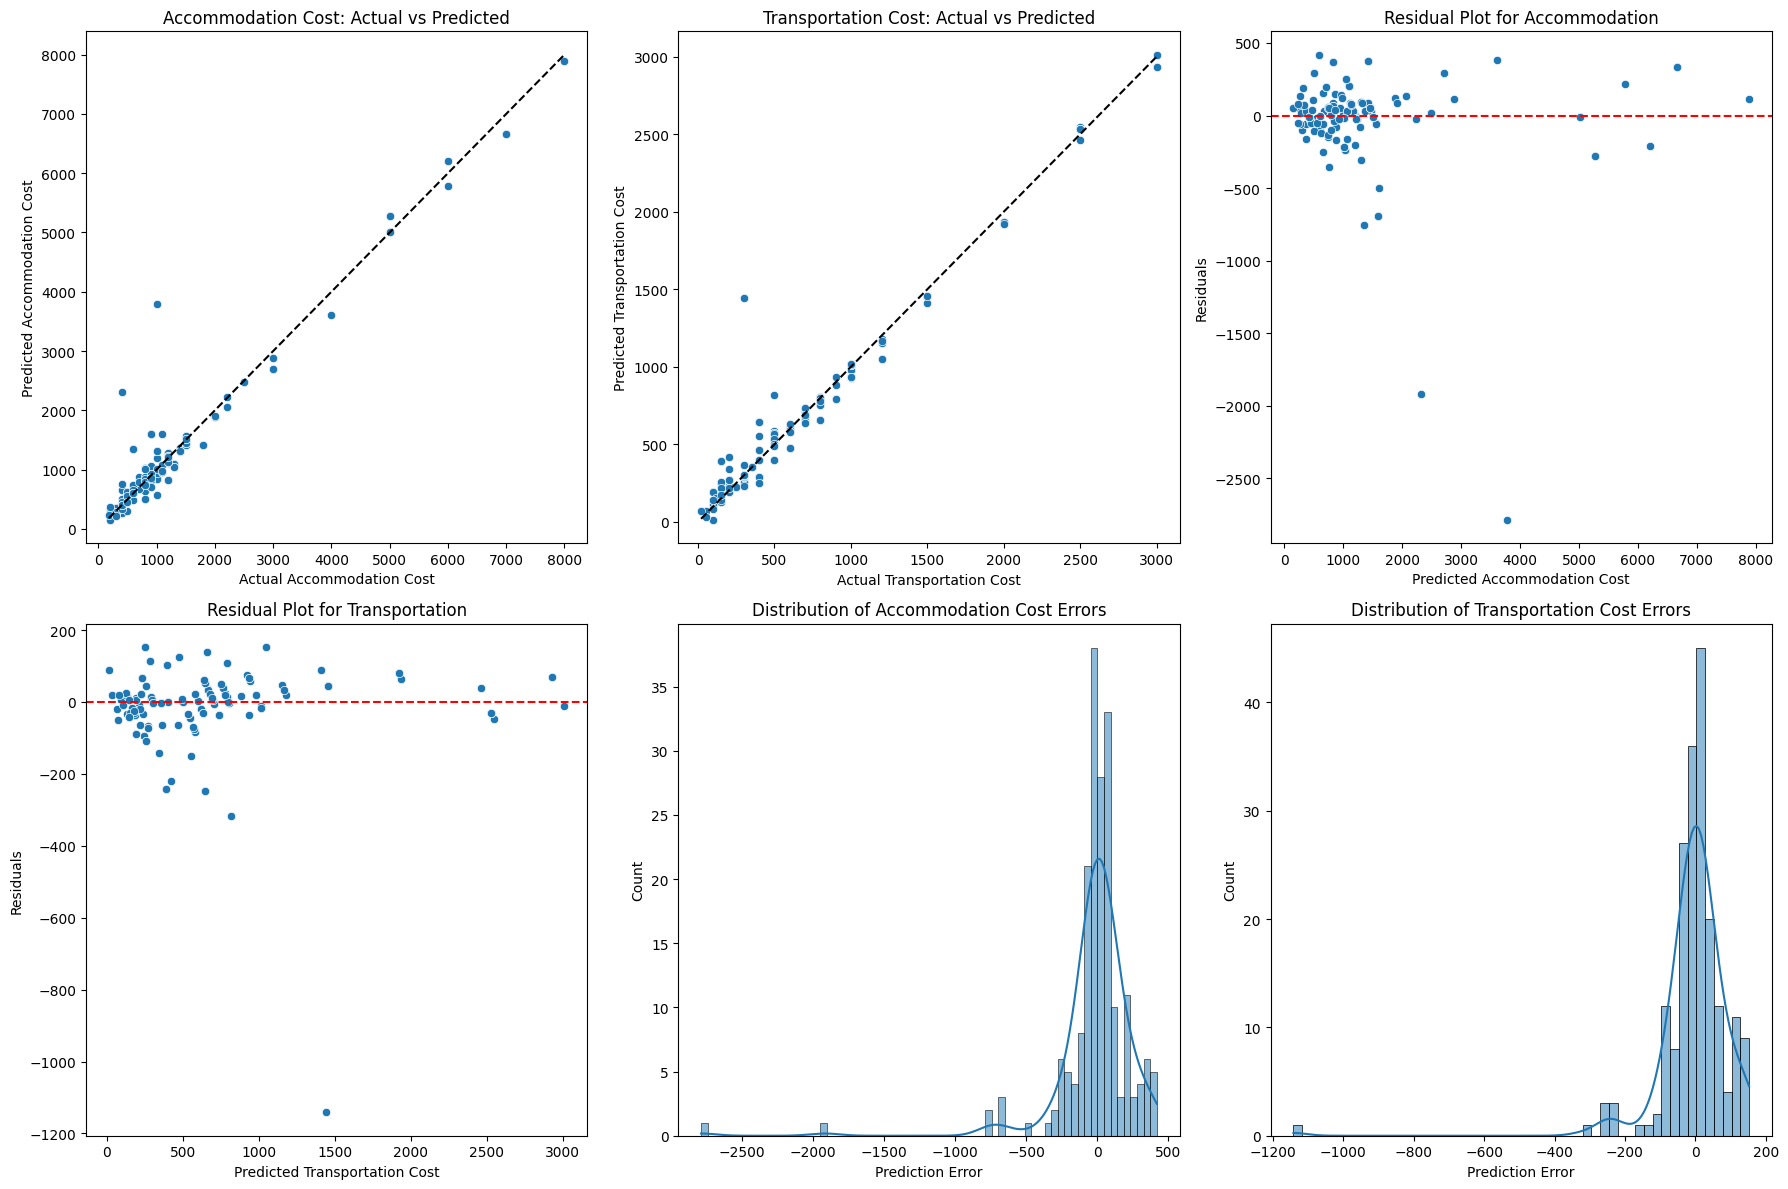

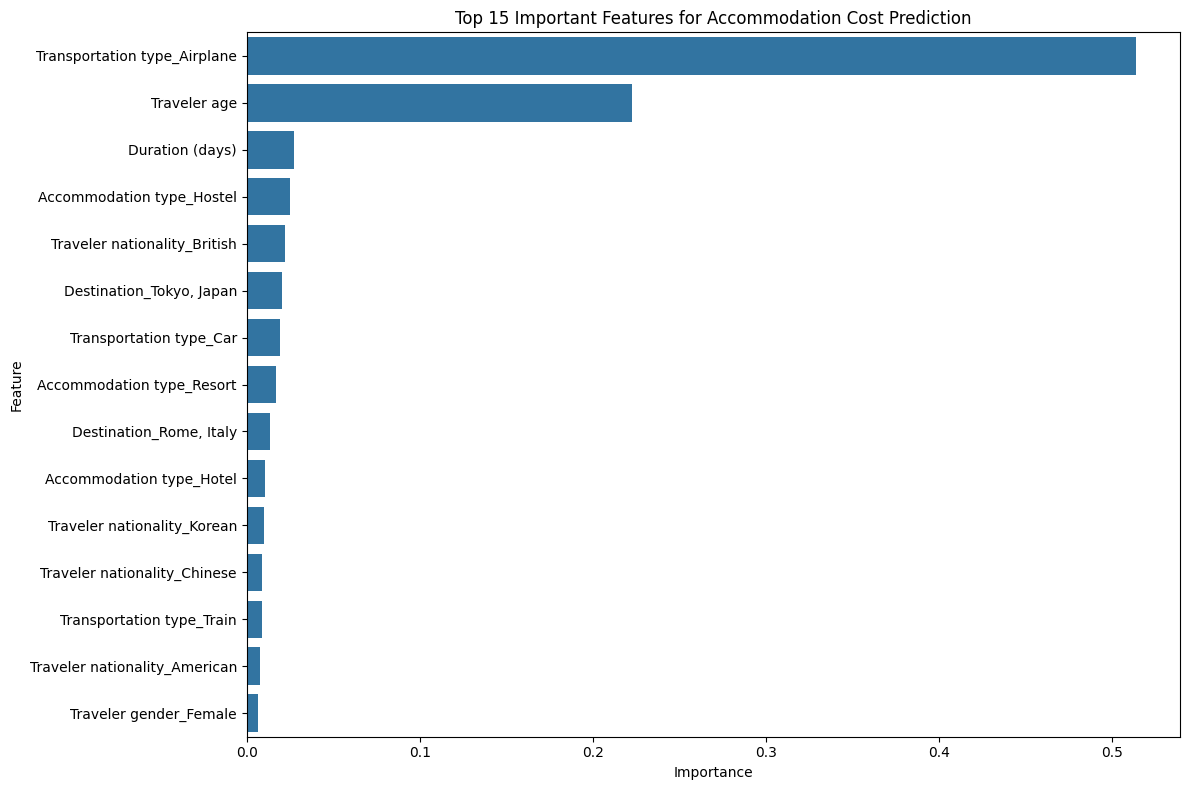

✅ Model saved as 'improved_multi_cost_predictor.pkl'

🔍 Sample Prediction:
Input:
            Destination  Duration (days)  Traveler age Traveler gender  \
203  Sydney, Australia              7.0          33.0            Male   

    Traveler nationality Accommodation type Transportation type  \
203             Canadian             Airbnb               Train   

    Duration_Group    Age_Group  
203         medium  middle_aged  
Predicted Accommodation Cost: $1035.96
Predicted Transportation Cost: $244.92
Actual Accommodation Cost: $800.00
Actual Transportation Cost: $150.00


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\Untitled spreadsheet - Expanded_Travel_Dataset.csv")

# 2. Drop unnecessary columns
df = df.drop(columns=["Trip ID", "Traveler name", "Start date", "End date"])

# 3. Clean and convert cost columns to numeric
def clean_currency(x):
    """Remove dollar signs and commas, convert to float"""
    if isinstance(x, str):
        return float(re.sub(r'[^\d.]', '', x))
    return float(x)

df['Accommodation cost'] = df['Accommodation cost'].apply(clean_currency)
df['Transportation cost'] = df['Transportation cost'].apply(clean_currency)

# 4. Handle missing values
df = df.dropna()

# 5. Feature Engineering
df['Duration_Group'] = pd.cut(df['Duration (days)'], 
                            bins=[0, 3, 7, 14, 30, 100],
                            labels=['short', 'medium', 'long', 'extended', 'very_long'])
df['Age_Group'] = pd.cut(df['Traveler age'],
                       bins=[0, 18, 30, 50, 100],
                       labels=['young', 'adult', 'middle_aged', 'senior'])

# 6. Define features and targets
X = df.drop(columns=["Accommodation cost", "Transportation cost"])
y = df[["Accommodation cost", "Transportation cost"]]

# 7. Identify column types
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

# 8. Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 9. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 10. Create and train the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MultiOutputRegressor(
        GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            random_state=42,
            min_samples_leaf=10
        )
    ))
])

model.fit(X_train, y_train)

# 11. Predict on test data
y_pred = model.predict(X_test)

# 12. Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("🎯 Evaluation Results:")
print("Mean Squared Error (Accommodation, Transportation):", mse)
print("R² Score (Accommodation, Transportation):", r2)

# 13. Visualizations
plt.figure(figsize=(18, 12))

# Scatter plots for actual vs predicted
plt.subplot(2, 3, 1)
sns.scatterplot(x=y_test.iloc[:, 0], y=y_pred[:, 0])
plt.plot([y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], 
         [y_test.iloc[:, 0].min(), y_test.iloc[:, 0].max()], 'k--')
plt.xlabel('Actual Accommodation Cost')
plt.ylabel('Predicted Accommodation Cost')
plt.title('Accommodation Cost: Actual vs Predicted')

plt.subplot(2, 3, 2)
sns.scatterplot(x=y_test.iloc[:, 1], y=y_pred[:, 1])
plt.plot([y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], 
         [y_test.iloc[:, 1].min(), y_test.iloc[:, 1].max()], 'k--')
plt.xlabel('Actual Transportation Cost')
plt.ylabel('Predicted Transportation Cost')
plt.title('Transportation Cost: Actual vs Predicted')

# Residual plots
plt.subplot(2, 3, 3)
residuals_accom = y_test.iloc[:, 0] - y_pred[:, 0]
sns.scatterplot(x=y_pred[:, 0], y=residuals_accom)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Accommodation Cost')
plt.ylabel('Residuals')
plt.title('Residual Plot for Accommodation')

plt.subplot(2, 3, 4)
residuals_trans = y_test.iloc[:, 1] - y_pred[:, 1]
sns.scatterplot(x=y_pred[:, 1], y=residuals_trans)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Transportation Cost')
plt.ylabel('Residuals')
plt.title('Residual Plot for Transportation')

# Distribution of errors
plt.subplot(2, 3, 5)
sns.histplot(residuals_accom, kde=True)
plt.title('Distribution of Accommodation Cost Errors')
plt.xlabel('Prediction Error')

plt.subplot(2, 3, 6)
sns.histplot(residuals_trans, kde=True)
plt.title('Distribution of Transportation Cost Errors')
plt.xlabel('Prediction Error')

plt.tight_layout()
plt.show()

# Feature Importance (for the first target - Accommodation)
try:
    # Get feature names after one-hot encoding
    feature_names = numeric_cols.tolist()
    ohe_categories = model.named_steps['preprocessor'].named_transformers_['cat'].categories_
    for i, col in enumerate(categorical_cols):
        feature_names.extend([f"{col}_{cat}" for cat in ohe_categories[i]])
    
    # Get feature importances from the first estimator (for Accommodation cost)
    importance = model.named_steps['regressor'].estimators_[0].feature_importances_
    
    # Create DataFrame and sort
    feature_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_imp = feature_imp.sort_values('Importance', ascending=False).head(15)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_imp)
    plt.title('Top 15 Important Features for Accommodation Cost Prediction')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not create feature importance plot: {e}")

# 14. Save the trained model
joblib.dump(model, "improved_multi_cost_predictor.pkl")
print("✅ Model saved as 'improved_multi_cost_predictor.pkl'")

# 15. Predict on a sample input
sample_input = X_test.iloc[[0]]
sample_prediction = model.predict(sample_input)

print("\n🔍 Sample Prediction:")
print("Input:\n", sample_input)
print("Predicted Accommodation Cost: ${:.2f}".format(sample_prediction[0][0]))
print("Predicted Transportation Cost: ${:.2f}".format(sample_prediction[0][1]))
print("Actual Accommodation Cost: ${:.2f}".format(y_test.iloc[0, 0]))
print("Actual Transportation Cost: ${:.2f}".format(y_test.iloc[0, 1]))